El Bagging consiste en un ensamble del mismo algoritmo múltiples veces utilizando diferentes conjuntos de entrenamiento los cuales consideran el reemplazo (Boostrap)

In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import seaborn as sns
sns.set()

In [54]:
n = 1000
xPlot = [(float(i)/float(n)-0.5) for i in range(n+1)]
x = [[s] for s in xPlot]

np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in xPlot]

In [55]:
# Definición de los índices para prueba y entrenamiento
nSample = int(n*0.3)
idxTest = np.random.choice(range(n),nSample)
idxTest.sort()

idxTrain = [idx for idx in range(n) if not (idx in idxTest)]

xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]

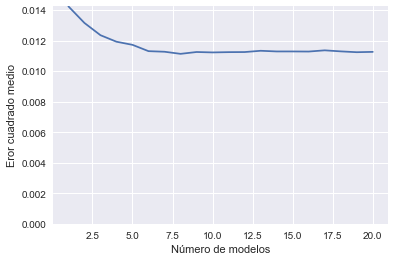

''

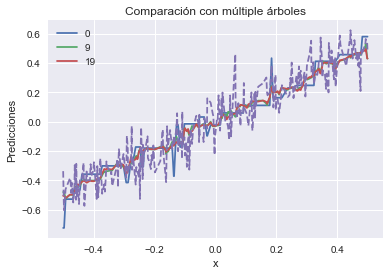

In [57]:
# Entrenar una serie de modelos en conjuntos aleatorios

# Número máximo de modelos a generar
numTreesMax = 20
treeDepth = 5

# Iniciar una lista para todos los modelos
modelList = []
predList = []

# Número de ejemlos estocásticos para bagging
nBagSamples = int(len(xTrain)*0.5)

for iTrees in range(numTreesMax):
    idxBag = np.random.choice(range(len(xTrain)), nBagSamples)
    xTrainBag = [xTrain[i] for i in idxBag]
    yTrainBag = [yTrain[i] for i in idxBag]
    
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrainBag,yTrainBag)
    
    # Realizar pronósticos con el último modelo y agregar los pronósticos
    latestPrediction = modelList[-1].predict(xTest)
    predList.append(latestPrediction)
    
mse = []
allPredictions = []
for iModels in range(len(modelList)):
    # Promedio del primer "iModel" de la predicción
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels+1)])/(iModels+1))
        
    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors])/len(yTest))
    
nModels = [i + 1 for i in range(len(modelList))]

plt.plot(nModels,mse)
plt.axis("tight")
plt.xlabel("Número de modelos")
plt.ylabel("Eror cuadrado medio")
plt.ylim((0.0, max(mse)))
plt.show()

plotList = [0,9,19]
for iPlot in plotList:
    plt.plot(xTest, allPredictions[iPlot], label=iPlot)
plt.title("Comparación con múltiple árboles")
plt.plot(xTest, yTest, linestyle="--")
plt.xlabel("x")
plt.ylabel("Predicciones")
plt.legend()
;